In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from ydata_profiling import ProfileReport
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, average_precision_score)
from sklearn.preprocessing import PowerTransformer

In [28]:
df = pd.read_csv('creditcard.csv')

In [29]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [31]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [32]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [33]:
df.duplicated().sum()

1081

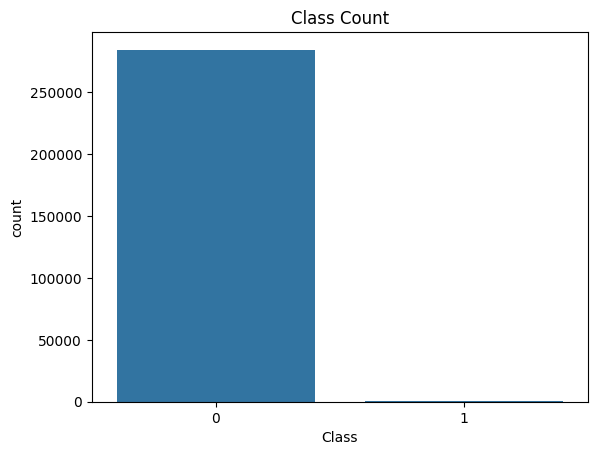

In [34]:
sns.countplot(x='Class', data=df)
plt.title('Class Count')
plt.show()

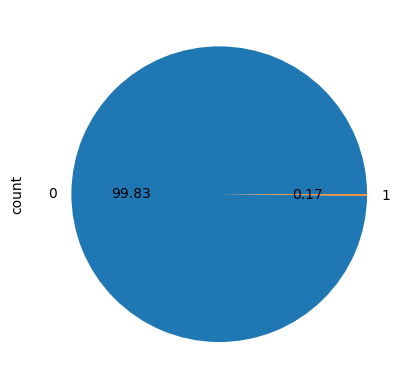

In [35]:
df['Class'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

In [36]:
classes = df['Class'].value_counts()
proportion_first_class = classes[0] / df['Class'].count()
print(proportion_first_class*100)

99.82725143693798


In [37]:
classes = df['Class'].value_counts()
proportion_first_class = classes[1] / df['Class'].count()
print(proportion_first_class*100)

0.1727485630620034


In [38]:
# profile = ProfileReport(df, title="credit card data",explorative=True,dark_mode=True)
# profile.to_file("creditcard.html")

In [39]:
Delta_time = pd.to_timedelta(df['Time'],unit = 's')
df['Time_day'] = (Delta_time.dt.components.days).astype(int)
df['Time_hour'] = (Delta_time.dt.components.hours).astype(int)
df['Time_min'] = (Delta_time.dt.components.minutes).astype(int)

In [40]:
df.drop('Time', axis=1, inplace=True)
df.drop(['Time_day', 'Time_min'], axis=1, inplace=True)

In [41]:
y = df['Class']
X = df.drop('Class',axis = 1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [43]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(X_train)
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)


Logistic Regression with L1 And L2 Regularisation
Parameters for L2 regularisation: 
[[-0.05193848  0.03312847 -0.17765124  0.30269612  0.06145696 -0.03409886
  -0.07809314 -0.22908605 -0.15740003 -0.27550866  0.2137667  -0.30182246
  -0.04094954 -0.50238331 -0.0187233  -0.13296348 -0.09621783  0.00422125
  -0.0168623  -0.01652788  0.05792706  0.03353771 -0.03303292 -0.03256379
  -0.02806544  0.02068073 -0.0320666  -0.01204353 -0.01521495 -0.01170878]]
[-6.90093092]


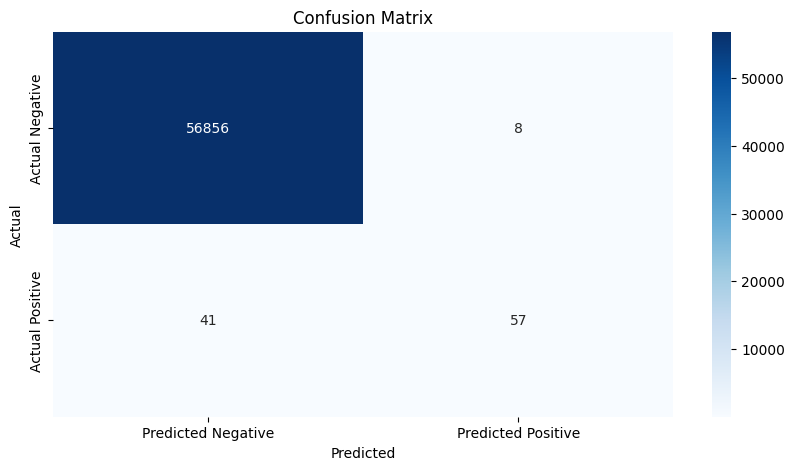

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.94      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



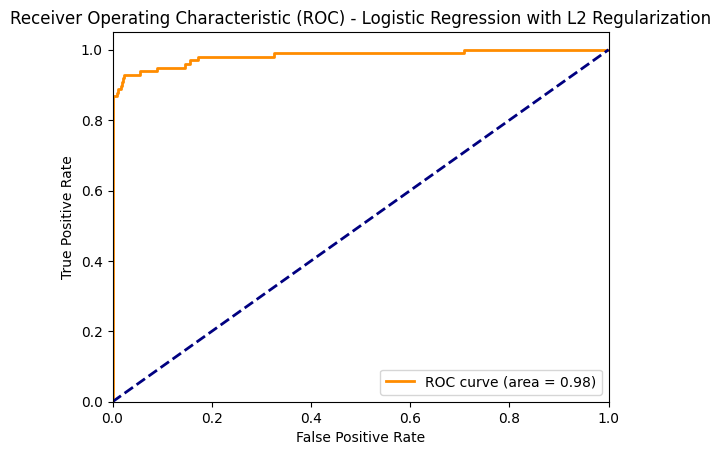

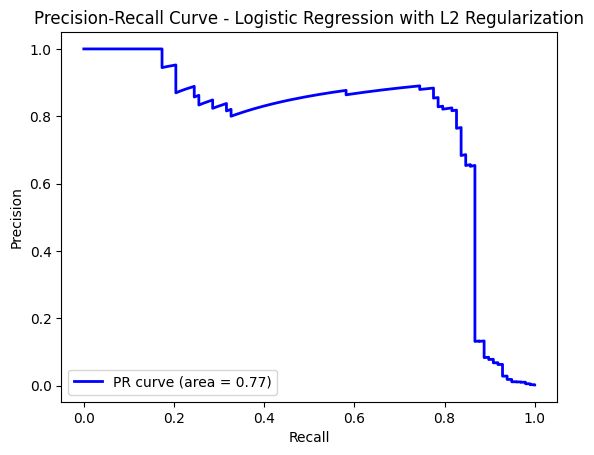

C:\Users\vinay\AppData\Local\Temp\ipykernel_20064\1848036602.py:75: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_Results = pd.concat([df_Results, eval_df], ignore_index=True)


Parameters for L1 regularisation: 
[[-0.07382207 -0.00690944 -0.16758523  0.23972663  0.02026203 -0.00838973
  -0.07956902 -0.20809431 -0.11847076 -0.19193798  0.17790455 -0.29502184
  -0.01297939 -0.4373112  -0.03404779 -0.12288698 -0.13225148 -0.00969004
  -0.01744002 -0.00811188  0.03190999  0.02912619 -0.03165305 -0.02404404
  -0.01881672  0.01193604 -0.01825409 -0.00965644 -0.00930092  0.00845049]]
[-6.07834148]


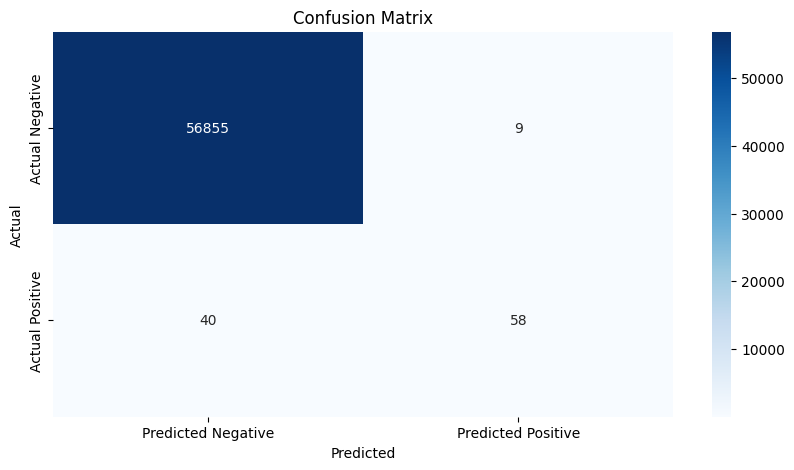

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.59      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



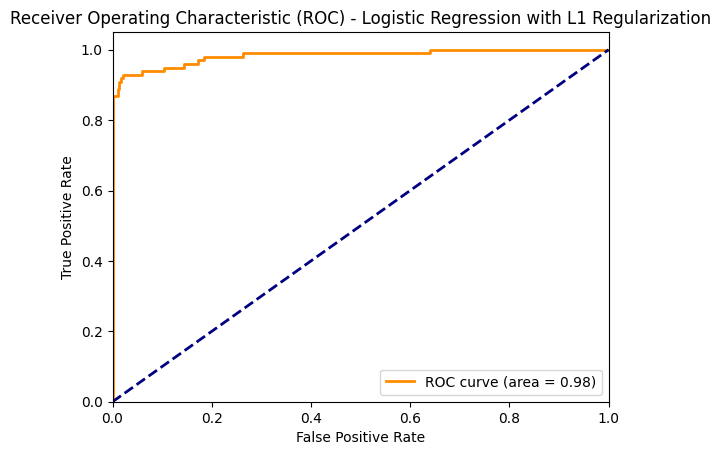

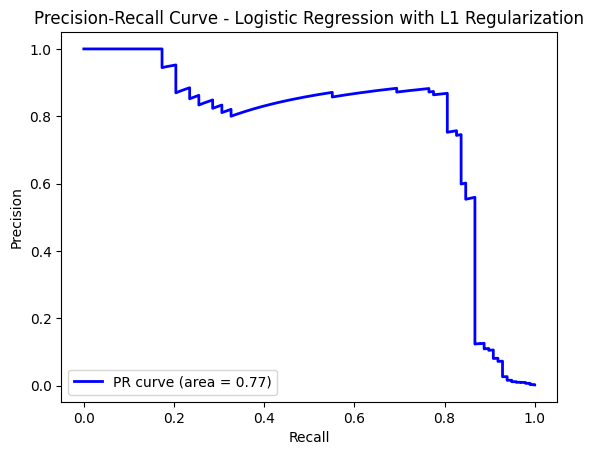

In [44]:
def plot_model_results(y_true, y_pred):
    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Print classification report
    print(classification_report(y_true, y_pred))

def plot_evaluation_metrics(y_true, y_pred, y_pred_probs, DataImbalance, model_name):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_probs)
    pr_auc = average_precision_score(y_true, y_pred_probs)
    
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - ' + model_name)
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot Precision-Recall curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred_probs)
    plt.figure()
    plt.plot(recall_vals, precision_vals, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - ' + model_name)
    plt.legend(loc="lower left")
    plt.show()

    # Create DataFrame for evaluation metrics
    eval_df = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'ROC AUC': [roc_auc],
        'PR AUC': [pr_auc],
        'Data Imbalance': [DataImbalance]
    })
    
    return eval_df

def buildAndRunLogisticModels(df_Results, DataImbalance, X_train, y_train, X_test, y_test): 
    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)
    searchCV_l2 = LogisticRegressionCV(Cs=num_C, penalty='l2', scoring='average_precision', cv=cv_num, random_state=42, max_iter=10000, fit_intercept=True, solver='sag', tol=10)
    searchCV_l2.fit(X_train, y_train)
    print("Parameters for L2 regularisation: ")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)  
    # Find predicted values
    y_pred_l2 = searchCV_l2.predict(X_test)
    # Find predicted probabilities
    y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:, 1] 
    plot_model_results(y_test, y_pred_l2)  # Plot confusion matrix and classification report
    eval_df = plot_evaluation_metrics(y_test, y_pred_l2, y_pred_probs_l2, DataImbalance, "Logistic Regression with L2 Regularization")  # Plot ROC curve and Evaluation metrics
    if not eval_df.empty:
        df_Results = pd.concat([df_Results, eval_df], ignore_index=True)
    
    searchCV_l1 = LogisticRegressionCV(Cs=num_C, penalty='l1', scoring='average_precision', cv=cv_num, random_state=42, max_iter=10000, fit_intercept=True, solver='liblinear', tol=10)
    searchCV_l1.fit(X_train, y_train)
    print("Parameters for L1 regularisation: ")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_) 
    # Find predicted values using L1 reg model
    y_pred_l1 = searchCV_l1.predict(X_test)
    # Find predicted probabilities
    y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:, 1] 
        
    plot_model_results(y_test, y_pred_l1)  # Plot confusion matrix and classification report
    eval_df = plot_evaluation_metrics(y_test, y_pred_l1, y_pred_probs_l1, DataImbalance, "Logistic Regression with L1 Regularization")
    if not eval_df.empty:
        df_Results = pd.concat([df_Results, eval_df], ignore_index=True)
    return df_Results

# Ensure the PowerTransformer steps are included
pt = PowerTransformer()
pt.fit(X_train)                       # Fit the PT on training data
X_train_pt = pt.transform(X_train)    # Then apply on all data
X_test_pt = pt.transform(X_test)

df_Results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'PR AUC', 'Data Imbalance'])
print("Logistic Regression with L1 And L2 Regularisation")
df_Results = buildAndRunLogisticModels(df_Results, "Power Transformer", X_train_pt, y_train, X_test_pt, y_test)


In [45]:
df_Results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,PR AUC,Data Imbalance
0,Logistic Regression with L2 Regularization,0.99914,0.876923,0.581633,0.699387,0.981989,0.770518,Power Transformer
1,Logistic Regression with L1 Regularization,0.99914,0.865672,0.591837,0.703030,0.983008,0.766015,Power Transformer
